In [1]:
import tensorflow as tf
import keras

/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


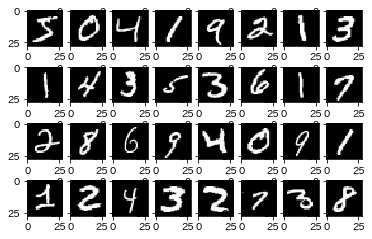

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# データを4x8に出力
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(X_train[i], cmap='gray')

pyplot.show()


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [9]:
# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# モデル構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
model.fit(X_train, y_train,
    batch_size=20, epochs=20)

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

Epoch 1/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.1906 - acc: 0.9431
Epoch 2/20
60000/60000 [==============================] - 30s 493us/step - loss: 0.0787 - acc: 0.9755
Epoch 3/20
60000/60000 [==============================] - 32s 535us/step - loss: 0.0520 - acc: 0.9835
Epoch 4/20
60000/60000 [==============================] - 28s 471us/step - loss: 0.0368 - acc: 0.9882
Epoch 5/20
60000/60000 [==============================] - 27s 457us/step - loss: 0.0275 - acc: 0.9912
Epoch 6/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.0234 - acc: 0.9921
Epoch 7/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.0193 - acc: 0.9934
Epoch 8/20
60000/60000 [==============================] - 27s 455us/step - loss: 0.0154 - acc: 0.9948
Epoch 9/20
60000/60000 [==============================] - 27s 442us/step - loss: 0.0137 - acc: 0.9952
Epoch 10/20
60000/60000 [==============================] - 27s 448us/step - loss: 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.2421 - acc: 0.9240 - val_loss: 0.1110 - val_acc: 0.9652
Epoch 2/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.1019 - acc: 0.9693 - val_loss: 0.0810 - val_acc: 0.9729
Epoch 3/50
60000/60000 [==============================] - 11s 189us/step - loss: 0.0751 - acc: 0.9779 - val_loss: 0.0728 - val_acc: 0.9776
Epoch 4/50
60000/60000 [==============================] - 11s 177us/step - loss: 0.0598 - acc: 0.9816 - val_loss: 0.0813 - val_acc: 0.9781
Epoch 5/50
60000/60000 [==============================] - 11s 177us/step - loss: 0.0511 - acc: 0.9850 - val_loss: 0.0787 - val_acc: 0.9777
Epoch 6/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0779 - val_acc: 0.9804
Epoch 7/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.0385 - acc: 0.9884 - val_loss: 0.

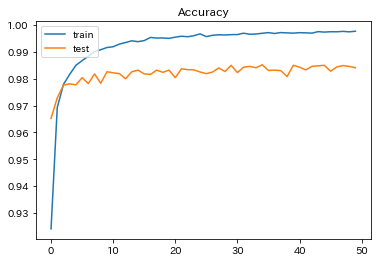

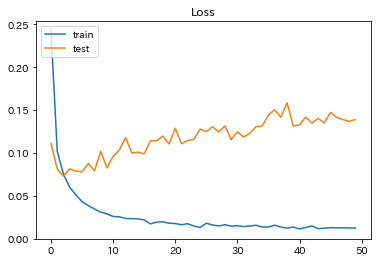

In [2]:
# MLPでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# MNISTのデータを読み込み --- (*1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# MLPモデル構造を定義 --- (*2)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築 --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 196s 3ms/step - loss: 0.2165 - acc: 0.9334 - val_loss: 0.0581 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 1187s 20ms/step - loss: 0.0820 - acc: 0.9756 - val_loss: 0.0389 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0633 - acc: 0.9818 - val_loss: 0.0370 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0539 - acc: 0.9843 - val_loss: 0.0515 - val_acc: 0.9843
Epoch 5/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0493 - acc: 0.9857 - val_loss: 0.0332 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0492 - acc: 0.9860 - val_loss: 0.0370 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 865s 14ms/step - loss: 0.0468 - acc: 0.9864 - val_loss: 0.0354

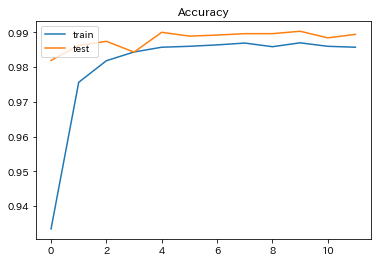

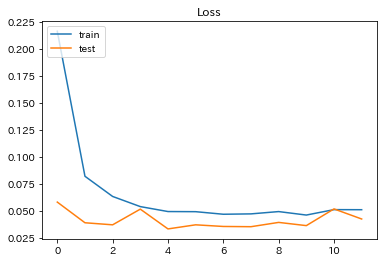

In [13]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_shape = (28, 28, 1)
out_size = 10


# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを(1, 28, 28)の三次元配列に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# CNNモデル構造を定義 --- (*2)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築 --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 読み込んだデータをの三次元配列に変換
X_train = X_train.reshape(-1, 28, 28, 1)
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
